In [1]:
import pandas as pd
import re
import numpy as np
import statistics

In [2]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', 500)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [4]:
df = pd.read_csv('litreleases_ponzi_analysis_UPDATED.csv')

In [5]:
df.shape

(454, 20)

In [46]:
df.head(10)

,Release No.,Civil Action No.,Respondents,Date,url,Usable_Cases,Distinct_Victims,Location,Investor_Characteristics,Investor_Scope,Investors_Int,Victims_Known,Money_Raised_Int,Start_Year,Outreach_Method,Pitch,Industry,Personal_Enrichment_Uses,Outcome,Notes
0,LR-23085,1:14-cv-23336,"Abatement Corp. Holding Company Limited, et al. See also: SEC Complaint","Sep. 16, 2014",https://www.sec.gov/litigation/litreleases/2014/lr23085.htm,1.0,y,Florida,"friends, family, acquaintances",Regional,50.0,y,4.6,2004.0,personal network,convinced investors to give him money through false claims that he would put their money into Abatement Corp.'s purported bond fund that invested in triple-A rated corporate and government bonds,investment fund,"real estate, life insurance",NaN,NaN
1,LR-23485,3:16-cv-00438-PK,"Aequitas Management, LLC, et al. See also: SEC Complaint","Mar. 11, 2016",https://www.sec.gov/litigation/litreleases/2016/lr23485.htm,1.0,y,Oregon,NaN,Nationwide,1500.0,y,350.0,2014.0,meetings with investors and financial advisors,"defrauded more than 1,500 investors nationwide into believing they were making health care, education, and transportation-related investments when their money was really being used in a last-ditch effort to save the firm. Some money from new investors was allegedly used to pay earlier investors in Ponzi-like fashion.",investment fund,NaN,NaN,NaN
2,LR-21934,3:11-CV-00176,"AIC, Inc., et al. See also: SEC Complaint","Apr. 18, 2011",https://www.sec.gov/litigation/litreleases/2011/lr21934.htm,1.0,y,Tennessee,senior citizens,Nationwide,74.0,y,7.7,2006.0,brokers,AIC promised to pay interest and dividends ranging from 9 to 12.5 percent on the promissory notes and stock knowing that it did not have the ability to pay those returns.,investment fund,NaN,NaN,sold to both accredited and unaccredited investors
3,LR-21436,3:10-cv-425-L,"Alan Todd May and Prosper Oil and Gas, Inc. a/k/a Prosper Energy, Inc. See also: SEC Complaint","Mar 4, 2010",https://www.sec.gov/litigation/litreleases/2010/lr21436.htm,1.0,y,Texas,NaN,Nationwide,99.0,y,6.0,2008.0,advertisements,royalty interests in oil-and-gas. promised annual returns of at elast 25%,oil-and-gas,"luxury cars, travel, real estate, lavish lifestyle",NaN,"defendant has long criminal history of theft and fraud. advertisements appeared in the wall street journal, among other publications"
4,LR-22642,CV 13-1629 ABC,"Alvin R. Brown, First Choice Investment, Inc. and Advanced Corporate Enterprises, Inc. d/b/a A-Corp Enterprises a/k/a ACorp Development a/k/a A-Corp Investment See also: SEC Complaint","Mar. 12, 2013",https://www.sec.gov/litigation/litreleases/2013/lr22642.htm,1.0,y,California,senior citizens,Nationwide,77.0,y,3.0,2011.0,"website, cold calls, emails to potential investors",falsely promising 10 percent annual returns and a planned initial public offering (IPO) at the end of 2012 that would net investors 150 percent of their original investment.,real estate,NaN,NaN,"Brown particularly targeted an elderly investor suffering from a stroke and dementia. Prominently displayed the seals of the SEC and the State of California as well as the NYSE, NASDAQ, and the Better Business Bureau to falsely imply to investors that these investments were endorsed by these organizations. In reality, the investment offerings were not registered with the SEC under the federal securities laws."
5,LR-24114,1:18-cv-00426,Amrit J. S. Chahal See also: SEC Complaint,"Apr. 16, 2018",https://www.sec.gov/litigation/litreleases/2018/lr24114.htm,1.0,y,Virginia,"friends, family",Regional,50.0,y,1.4,2015.0,personal network,lured investors by falsely claiming to be an experienced and successful trader who could generate above-market returns for clients through a low-risk trading strategy,investment fund,"luxury car, living expenses",NaN,NaN
6,LR-21381,08-23024-CIV-GRAHAM,"Andres L. Pimstein, The Bottom Line of South Florida, Inc. and Summit Trading LLC","Jan 19, 2010",https://www.sec.gov/litigation/litreleases

In [47]:
# How many new cases were brought between 2009-2018?
df.Usable_Cases.sum()
# 292 new cases brought 
# USE THIS NUMBER 

292.0

In [48]:
# How many new ponzi schemes were caught?
df.Distinct_Victims.value_counts()
# 264 new ponzi schemes acted upon

y    264
n    188
Name: Distinct_Victims, dtype: int64

In [49]:
# Create a new dataframe for distinct ponzi schemes for analysis
distinct_schemes_df = df[df['Distinct_Victims'] == 'y']

In [50]:
distinct_schemes_df.shape

(264, 20)

In [55]:
distinct_schemes_df.dtypes

Release No.                 object 
Civil Action No.            object 
Respondents                 object 
Date                        object 
url                         object 
Usable_Cases                float64
Distinct_Victims            object 
Location                    object 
Investor_Characteristics    object 
Investor_Scope              object 
Investors_Int               float64
Victims_Known               object 
Money_Raised_Int            float64
Start_Year                  float64
Outreach_Method             object 
Pitch                       object 
Industry                    object 
Personal_Enrichment_Uses    object 
Outcome                     object 
Notes                       object 
dtype: object

In [52]:
# How much money was raised in total?
distinct_schemes_df.Money_Raised_Int.sum()
# $31065.8 million == $31.066 billion

31063.96

In [53]:
# How many investors were there in total?
distinct_schemes_df.Investors_Int.sum()
# roughly 4.3 million investors defrauded

4267203.7

In [51]:
# What were states were the most ponzi scheme cases filed in?
distinct_schemes_df.Location.value_counts().head(10)

California      46
Texas           29
Florida         26
New York        24
Utah            17
Illinois        11
Colorado        11
Pennsylvania    9 
Michigan        9 
Georgia         9 
Name: Location, dtype: int64

In [56]:
# Creating a new column for the year of the Litigation Release
distinct_schemes_df['Release_Year'] = distinct_schemes_df.Date.str.extract("([0-9]{4})")

/Users/angelawang/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [82]:
#distinct_schemes_df.head()

In [58]:
# How many ponzi cases were filed each year? Looking for trends
distinct_schemes_df.Release_Year.value_counts()

2009    55
2010    41
2011    30
2017    26
2012    24
2018    21
2015    21
2013    16
2016    15
2014    15
Name: Release_Year, dtype: int64

In [59]:
# Converting year column to datetime
distinct_schemes_df['release_year_dt'] = pd.to_datetime(distinct_schemes_df['Release_Year'], format="%Y")

/Users/angelawang/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


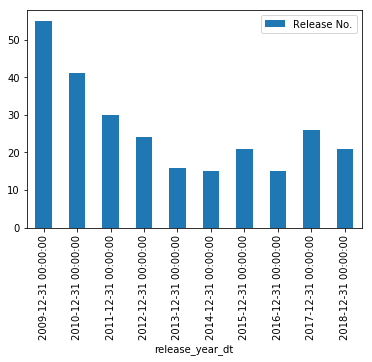

In [60]:
# Plotting the number of ponzi schemes per year
distinct_schemes_df.resample('A', on='release_year_dt').count().plot(kind='bar', y=['Release No.'])

In [61]:
# Looking at the scope of the ponzi schemes
distinct_schemes_df.Investor_Scope.value_counts()

Nationwide                                93
Regional                                  61
International                             38
Nationwide, International                 2 
Nationwide (primarily southeastern US)    1 
Regional                                  1 
Name: Investor_Scope, dtype: int64

In [62]:
# looking at the industries of the ponzi schemes
distinct_schemes_df.Industry.value_counts()

investment fund                                   119
real estate                                       18 
oil-and-gas                                       15 
hedge fund                                        8  
loans                                             6  
insurance                                         4  
real estate, mortgages                            4  
investment fund, tech                             3  
life insurance                                    3  
CDs, financial products                           3  
entertainment                                     3  
advertising                                       3  
ATMs, financial products                          2  
consumer electronics                              2  
natural resources                                 2  
ecommerce, pyramid scheme, cryptocurremcy         1  
real estate (luxury units)                        1  
retail                                            1  
death, funerals             

In [63]:
# How many schemes involved real estate?
distinct_schemes_df.Industry.str.contains('real estate').sum()

33

In [64]:
# How many schemes involved oil?
distinct_schemes_df.Industry.str.contains('oil').sum()

19

In [65]:
# How many schemes involved natural resources?
distinct_schemes_df.Industry.str.contains('natural').sum()

6

In [66]:
# How many schemes were general "investment funds"?
distinct_schemes_df.Industry.str.contains('investment fund').sum()

135

In [67]:
# Looking for crypto/Bitcoin schemes
distinct_schemes_df[distinct_schemes_df.Industry.str.contains('crypto', na=False)]

,Release No.,Civil Action No.,Respondents,Date,url,Usable_Cases,Distinct_Victims,Location,Investor_Characteristics,Investor_Scope,Investors_Int,Victims_Known,Money_Raised_Int,Start_Year,Outreach_Method,Pitch,Industry,Personal_Enrichment_Uses,Outcome,Notes,Release_Year,release_year_dt
193,LR-23415,3:15-cv-01760,Homero Joshua Garza See also: SEC Complaint,"Dec. 1, 2015",https://www.sec.gov/litigation/litreleases/2015/lr23415.htm,1.0,y,Connecticut,NaN,NaN,10000.0,y,20.0,2014.0,"website, marketing","purported to offer shares of a digital Bitcoin mining operation. In reality, GAW Miners and ZenMiner did not own enough computing power for the mining it promised to conduct, so most investors paid for a share of computing power that never existed","cryptocurrency, equity",NaN,ordered to pay 9.8 million; sentenced to prison in a parallel wire fraud case,NaN,2015,2015-01-01
423,LR-23090,4:13-CV-416,Trendon T. Shavers and Bitcoin Savings and Trust,"Sep. 22, 2014",https://www.sec.gov/litigation/litreleases/2014/lr23090.htm,1.0,y,Texas,NaN,Nationwide,66.0,y,4.5,2011.0,"online chat rooms, Bitcoin Forum","promised up to 7% returns weekly based on his claimed trading of bitcoin against the U.S. dollar, including selling bitcoins to individuals who wanted to buy them ""off the radar.""",cryptocurrency,NaN,NaN,NaN,2014,2014-01-01
452,LR-24345,2:18-cv-08497,"Eric J. ""EJ"" Dalius et al. See also: SEC Complaint","Nov. 8, 2018",https://www.sec.gov/litigation/litreleases/2018/lr24345.htm,1.0,y,California,NaN,International,NaN,n,165.0,2015.0,NaN,"sold securities that entitled holders to receive 20% cash back on their shopping purchases in exchange for paying a fee of $125 every 28 days, and submission of receipts. Dalius and the Saivian companies falsely claimed that Saivian funded its cash back payments to members by monetizing the point-of-sale receipt data submitted by its members.","ecommerce, pyramid scheme, cryptocurremcy","lavish lifestyle, real estate, private jet travel",NaN,financial crimes recidivist,2018,2018-01-01


In [68]:
# How many states were cases filed in?
distinct_schemes_df.Location.value_counts().count()

36

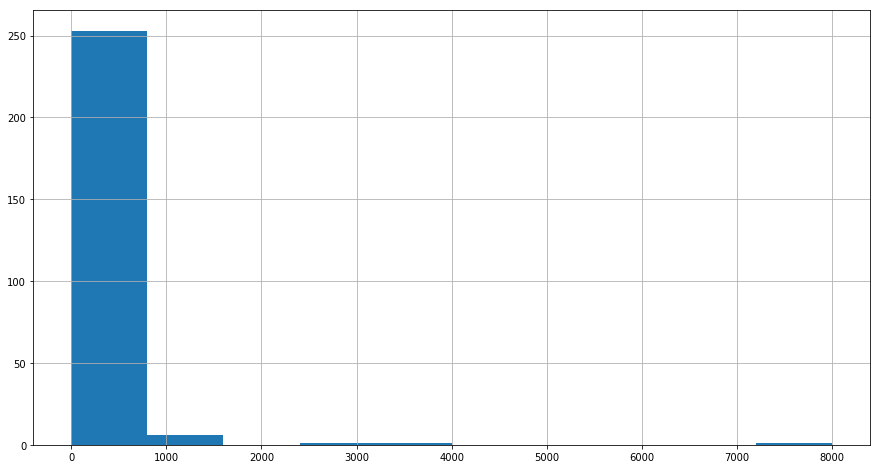

In [70]:
# Looking at a histogram of money raised
distinct_schemes_df.Money_Raised_Int.hist(figsize=(15, 8))

In [71]:
# Basic descriptive statistics for money raised. The median is $15.25 million
distinct_schemes_df.Money_Raised_Int.describe()

count    262.000000 
mean     118.564733 
std      589.408444 
min      0.250000   
25%      5.500000   
50%      15.250000  
75%      40.750000  
max      8000.000000
Name: Money_Raised_Int, dtype: float64

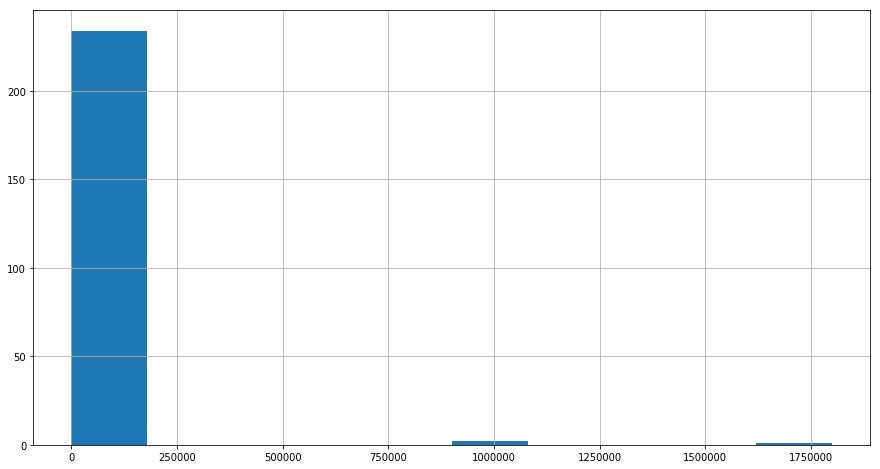

In [73]:
# Looking at a histogram of investor count per scheme
distinct_schemes_df.Investors_Int.hist(figsize=(15, 8))

In [74]:
# Basic descriptive statistics for investors involved. The median is 93 investors
distinct_schemes_df.Investors_Int.describe()

count    2.370000e+02
mean     1.800508e+04
std      1.486341e+05
min      2.000000e+00
25%      4.000000e+01
50%      9.300000e+01
75%      2.000000e+02
max      1.800000e+06
Name: Investors_Int, dtype: float64

In [76]:
# export to csv
distinct_schemes_df.to_csv("distinct_schemes.csv", index=False)

In [77]:
distinct_schemes_df.dtypes

Release No.                 object        
Civil Action No.            object        
Respondents                 object        
Date                        object        
url                         object        
Usable_Cases                float64       
Distinct_Victims            object        
Location                    object        
Investor_Characteristics    object        
Investor_Scope              object        
Investors_Int               float64       
Victims_Known               object        
Money_Raised_Int            float64       
Start_Year                  float64       
Outreach_Method             object        
Pitch                       object        
Industry                    object        
Personal_Enrichment_Uses    object        
Outcome                     object        
Notes                       object        
Release_Year                object        
release_year_dt             datetime64[ns]
dtype: object

In [78]:
# verifying data for my bubble chart timeline
distinct_schemes_df[distinct_schemes_df['Release_Year'] == '2009'].sort_values(by='Money_Raised_Int', ascending=False)

,Release No.,Civil Action No.,Respondents,Date,url,Usable_Cases,Distinct_Victims,Location,Investor_Characteristics,Investor_Scope,Investors_Int,Victims_Known,Money_Raised_Int,Start_Year,Outreach_Method,Pitch,Industry,Personal_Enrichment_Uses,Outcome,Notes,Release_Year,release_year_dt
396,LR-20901,3-09CV0298-L,"Stanford International Bank, et al. See also: SEC Complaint; SEC First Amended Complaint; Memorandum of Law","Feb. 17, 2009",https://www.sec.gov/litigation/litreleases/2009/lr20901.htm,1.0,y,Texas,NaN,International,30000.0,y,8000.0,1991.0,NaN,"sold approximately $8 billion of so-called “certificates of deposit” to investors by promising improbable and unsubstantiated high interest rates, supposedly earned through its unique investment strategy, which has purportedly allowed the bank to achieve double-digit returns on its investments over the past 15 years","CDs, financial products","lavish lifestyle, private jets",robert allen stanford sentenced to 110 years in federal prison,"as the market absorbed the news of Bernard Madoff’s massive Ponzi scheme, SIB attempted to calm its own investors by falsely claiming the bank has no “direct or indirect” exposure to the Madoff scheme",2009,2009-01-01
413,LR-21124,09 SC 1750 ADM/JSM,"Thomas J. Petters, Gregory M. Bell and Lancelot Investment Management LLC, Defendants, and Inna Goldman, Inna Goldman Revocable Trust, Asia Trust Ltd., Blue Sky Trust, and Gregory Bell Revocable Trust, Relief Defendants See also: SEC Complaint","Jul. 10, 2009",https://www.sec.gov/litigation/litreleases/2009/lr21124.htm,1.0,y,Minnesota,"Individuals, retirement plans, individual retirement accounts, trusts, corporations, hedge funds",International,364.0,y,3700.0,1995.0,"meetings, flowchart","promising investors that proceeds from the notes they were sold would be used to finance the purchase of vast amounts of consumer electronics by vendors who then re-sold the merchandise to ""Big Box"" retailers including such well-known chains as Wal-Mart and Costco. sellling notes issued by Petters Co. and promising high rates of return (at least 11%/year)",consumer electronics,NaN,sentenced to 50 years in federal prison,NaN,2009,2009-01-01
345,LR-21118,3-09CV1238-L,"Provident Royalties, LLC et al. See also: SEC Complaint","Jul. 7, 2009",https://www.sec.gov/litigation/litreleases/2009/lr21118.htm,1.0,y,Texas,NaN,Nationwide,7700.0,y,485.0,2006.0,broker-dealers,fraudulent offerings of preferred stock and limited partnership interests for the purpose of generating promised returns through investments in oil and gas assets,oil-and-gas,NaN,sentenced to time in federal prison and ordered to pay 2.3 million in restitution,NaN,2009,2009-01-01
426,LR-21313,09 CV 3333,"Trevor G. Cook, Patrick J. Kiley, et al See also: SEC Complaint","Nov. 24, 2009",https://www.sec.gov/litigation/litreleases/2009/lr21313.htm,1.0,y,Minnesota,senior citizens,Nationwide,1000.0,y,190.0,2006.0,"a radio program called ""Follow the Money,"" website, business cards, word of mouth",misrepresenting that they would deposit each investor's funds into a separate account in the investor's name to trade in foreign currencies and generate annual returns of 10 percent to 12 percent,investment fund,"other business ventures, gambling, historic real estate",both defendants sentenced to federal prison. main defendant sentenced to 25 years,NaN,2009,2009-01-01
339,LR-21076,CV-09-2554 MMC,"Peter C. Son, Jin K. Chung, SNC Asset Management, Inc., and SNC Investments, Inc. See also: SEC Complaint","Jun. 9, 2009",https://www.sec.gov/litigation/litreleases/2009/lr21076.htm,1.0,y,California,korean-americans,International,500.0,y,80.0,2003.0,"personal sales, word of mouth, advertisements in korean newspapers, an ad in Business Week disguised as an excerpt","promised investors spectacular annual returns of up to 36 percent from forex trading, and told investors that SNCA had generated 50 percent profits from such trading each year since 2003.",investment fund,personal expens

In [80]:
# verifying data for my bubble chart timeline
distinct_schemes_df[distinct_schemes_df['Release_Year'] == '2016'].sort_values(by='Money_Raised_Int', ascending=False)

,Release No.,Civil Action No.,Respondents,Date,url,Usable_Cases,Distinct_Victims,Location,Investor_Characteristics,Investor_Scope,Investors_Int,Victims_Known,Money_Raised_Int,Start_Year,Outreach_Method,Pitch,Industry,Personal_Enrichment_Uses,Outcome,Notes,Release_Year,release_year_dt
408,LR-23450,1:14-cv-11858-DJC,"TelexFree, Inc. et al., Carlos Nataniel Wanzeler, and James Matthew Merrill","Jan. 20, 2016",https://www.sec.gov/litigation/litreleases/2016/lr23450.htm,2.0,y,Massachusetts,"dominican immigrants, brazilian immigrants",International,1800000.0,y,3000.00,2012.0,"internet advertisements, recruiting","a multilevel marketing company that sells telephone service based on ""voice over Internet"" (VoIP) technology","telecommunications, pyramid scheme",NaN,"one founder fled to Brazil, one founder sentenced to 6 years in federal prison, the companies settled with the SEC",NaN,2016,2016-01-01
1,LR-23485,3:16-cv-00438-PK,"Aequitas Management, LLC, et al. See also: SEC Complaint","Mar. 11, 2016",https://www.sec.gov/litigation/litreleases/2016/lr23485.htm,1.0,y,Oregon,NaN,Nationwide,1500.0,y,350.00,2014.0,meetings with investors and financial advisors,"defrauded more than 1,500 investors nationwide into believing they were making health care, education, and transportation-related investments when their money was really being used in a last-ditch effort to save the firm. Some money from new investors was allegedly used to pay earlier investors in Ponzi-like fashion.",investment fund,NaN,NaN,NaN,2016,2016-01-01
16,LR-23520,1:16-cv-21301-DPG,"Ariel Quiros, et al.","Apr. 14, 2016",https://www.sec.gov/litigation/litreleases/2016/lr23520.htm,1.0,y,Florida,"immigrants, EB-5 program","Nationwide, International",700.0,y,350.00,2008.0,"events overseas, speaking at immigration conferences","Investors were told they were investing in one of several projects connected to Jay Peak Inc., a ski resort operated by Quiros and Stenger, and their money would only be used to finance that specific projec","recreation, science","real estate, income tax",NaN,solicited under the EB-5 Immigrant Investor Program. Vermont-based ski resort and related businesses,2016,2016-01-01
422,LR-23604,2:16-cv-00832-JNP,Traffic Monsoon et al. See also: SEC Complaint,"Jul. 28, 2016",https://www.sec.gov/litigation/litreleases/2016/lr23604.htm,1.0,y,Utah,NaN,International,162000.0,y,207.00,2014.0,"website, youtube videos",an Internet-based Ponzi scheme that they falsely represented to investors was an advertising company. a combination Internet traffic exchange and pay-per-click program,advertising,NaN,NaN,NaN,2016,2016-01-01
21,LR-23579,16-CV-1417-M,"Ash Narayan, The Ticket Reserve Inc. a/k/a Forward Market Media, Inc., Richard M. Harmon, and John A. Kaptrosky See also: SEC Complaint","Jun. 21, 2016",https://www.sec.gov/litigation/litreleases/2016/lr23579.htm,1.0,y,Texas,NaN,NaN,77.0,y,33.00,2010.0,NaN,"Narayan has transferred over $33 million from clients' accounts to The Ticket Reserve, typically without their knowledge or consent and often using forged or unauthorized signatures",investment fund,NaN,settled in 2018,NaN,2016,2016-01-01
292,LR-23451,2:16-cv-00040,"Marquis Properties, LLC See also: SEC Complaint","Jan. 21, 2016",https://www.sec.gov/litigation/litreleases/2016/lr23451.htm,1.0,y,Utah,NaN,Nationwide,250.0,y,28.00,2010.0,"personal solicitations, advertisements, real estate seminars, retirement seminars, referrals",represented that it would use investor funds to purchase real properties and that investors would receive guaranteed profits and return of principal upon sale of the properties.,real estate,personal expenses,criminal charges filed,NaN,2016,2016-01-01
334,LR-23612,15-cv-00191-S-LDA,Patrick Churchville,"Aug. 5, 2016",https://www.sec.gov/litigation/litreleases/2016/lr23612.htm,1.0,y,Rhode Island,NaN,NaN,NaN,n,21.00,2010.0,NaN,misappropriated money from funds he advised,investment fund,NaN,sentenced to 7 years in federal prison in parallel criminal actio

In [81]:
# verifying data for my bubble chart timeline
distinct_schemes_df[distinct_schemes_df['Release_Year'] == '2018'].sort_values(by='Money_Raised_Int', ascending=False)

,Release No.,Civil Action No.,Respondents,Date,url,Usable_Cases,Distinct_Victims,Location,Investor_Characteristics,Investor_Scope,Investors_Int,Victims_Known,Money_Raised_Int,Start_Year,Outreach_Method,Pitch,Industry,Personal_Enrichment_Uses,Outcome,Notes,Release_Year,release_year_dt
26,LR-24243,1:18-cv-23369,"Barry M. Kornfeld, et al., Lynette M. Robbins and Knowles Systems, Inc.","Aug. 22, 2018",https://www.sec.gov/litigation/litreleases/2018/lr24243.htm,1.0,y,Florida,"retail investors (individuals), senior citizens",Nationwide,8400.0,y,1220.00,2013.0,"advertisements on television, radio, email, newspapers, social media, investment seminars, sales agents, a class they taught","touted Woodbridge as a ""safe and secure"" investment. The Kornfelds allegedly solicited investors at seminars and a ""conservative retirement and income planning class"" they taught at a Florida university",investment fund,NaN,NaN,part of Robert Shapiro's Woodbridge ponzi scheme. many invested their retirement savings,2018,2018-01-01
304,LR-24313,RDB-18-2844,"Merrill, et al.","Oct. 11, 2018",https://www.sec.gov/litigation/litreleases/2018/lr24313.htm,1.0,y,Maryland,"individuals, groups",Nationwide,230.0,y,364.00,2013.0,NaN,"promised significant profits from the purchase and resale of consumer debt portfolios. But in fact, the defendants were allegedly using a web of lies, fabricated documents, and forged signatures in an elaborate scheme to entice investors and perpetuate the fraud","debt, financial products","lavish lifestyle, at least 25 luxury vehicles, luxury real estate, jewelry, gambling, private jet travel",parallel criminal charges filed,NaN,2018,2018-01-01
452,LR-24345,2:18-cv-08497,"Eric J. ""EJ"" Dalius et al. See also: SEC Complaint","Nov. 8, 2018",https://www.sec.gov/litigation/litreleases/2018/lr24345.htm,1.0,y,California,NaN,International,NaN,n,165.00,2015.0,NaN,"sold securities that entitled holders to receive 20% cash back on their shopping purchases in exchange for paying a fee of $125 every 28 days, and submission of receipts. Dalius and the Saivian companies falsely claimed that Saivian funded its cash back payments to members by monetizing the point-of-sale receipt data submitted by its members.","ecommerce, pyramid scheme, cryptocurremcy","lavish lifestyle, real estate, private jet travel",NaN,financial crimes recidivist,2018,2018-01-01
381,LR-24172,18-cv-5491,"Santillo, et al. See also: SEC Complaint","Jun. 20, 2018",https://www.sec.gov/litigation/litreleases/2018/lr24172.htm,1.0,y,New York,some senior citizens,Nationwide,637.0,y,102.00,2011.0,defendants buy or take over books of retiring investment professionals and convince their clients to move their money over,"sales of securities in issuers they controlled, including First Nationle Solution LLC, United RL Capital Services, and Percipience Global Corp. The complaint alleges that investors were told that their funds would be used for the companies and some were guaranteed dividends or double-digit returns",investment fund,"lavish lifestyle, party at a las vegas nightclub where defendant commissioned a song about himself",NaN,NaN,2018,2018-01-01
20,LR-24129,3:18-cv-252-DPJ-FKB,"Arthur Lamar Adams and Madison Timber Properties, LLC See also: SEC Complaint","May 2, 2018",https://www.sec.gov/litigation/litreleases/2018/lr24129.htm,1.0,y,Mississippi,NaN,Nationwide (primarily southeastern US),150.0,y,85.00,2004.0,NaN,promised annual returns of 12-15%. returns from the sale of harvested timber,natural resources,"real estate, personal expenses",NaN,NaN,2018,2018-01-01
347,LR-24158,2:18-cv-05008,Ralph T. Iannelli et al. See also: SEC Complaint,"Jun. 6, 2018",https://www.sec.gov/litigation/litreleases/2018/lr24158.htm,1.0,y,California,"friends, affluent acquaintances",Regional,70.0,y,80.00,2014.0,"personal network, referrals, advisory clients",made a series of false and misleading statements and illusory personal guarantees to registered investment advisers to induce them to invest mil